# Laboratorio #1

ISIS 3301 - Business Inteligence

Ronald Yesid Diaz Pardo - 202111309 - r.diazp <br>
Andres Guerrero - ### <br>
Lorem - ### <br>

### A. Entendimiento de datos

En esta etapa es importante saber si los datos son o no suficientes para el alcance del proyecto y, en caso de serlo, entender bien sus características para poder definir el camino de limpieza y preparación para lograr el objetivo del proyecto.
En particular, deben incluir cuántos datos se tienen (filas y columnas) y los tipos de variables. Es importante realizar un perfilamiento completo   que incluya estadística descriptiva y gráficos sobre los datos, señalando sus principales estadísticos: media, varianza, desviación estándar, etc., para el caso de las columnas numéricas. En caso de datos categóricos recuerde que es importante conocer las categorías y en qué proporción se presentan. Tener en cuenta que una parte importante de esta etapa está relacionada con el análisis a nivel de calidad de datos y, en particular, a nivel de las dimensiones de calidad (completitud, unicidad, consistencia, validez) para identificar las actividades de preparación que requieren los datos.

**0. Cargar data**

In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()  # for plot styling

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots


In [3]:
data_file = "../data/data.csv"

data = pd.read_csv(data_file)

**1. Cuantos datos se tienen (filas y columnas) y los tipos de variables**

In [4]:
print("Number of rows: ", data.shape[0])
print("Number of columns: ", data.shape[1])

print("\n\n", data.head())

Number of rows:  8961
Number of columns:  18


   CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8961 entries, 0 to 8960
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8961 non-null   object 
 1   BALANCE                           8961 non-null   object 
 2   BALANCE_FREQUENCY                 8961 non-null   float64
 3   PURCHASES                         8961 non-null   float64
 4   ONEOFF_PURCHASES                  8961 non-null   float64
 5   INSTALLMENTS_PURCHASES            8961 non-null   float64
 6   CASH_ADVANCE                      8951 non-null   float64
 7   PURCHASES_FREQUENCY               8961 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8948 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8961 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8961 non-null   float64
 11  CASH_ADVANCE_TRX                  8961 non-null   int64  
 12  PURCHA

**2. Gráficos sobre los datos, señalando sus principales estadísticos: media, varianza, desviación estándar, etc.**

2.1 Perfilamiento de los datos

Estadistica descriptiva

In [6]:
data.describe()

,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8961.000000,8961.000000,8961.000000,8961.000000,8951.000000,8961.000000,8948.000000,8961.000000,8961.000000,8961.000000,8961.000000,8954.000000,8961.000000,8648.000000,8961.000000,8961.000000
mean,0.877337,1002.463128,591.909000,410.853942,975.911735,0.490390,0.205296,0.364427,0.135100,3.247071,14.701149,4492.107229,1732.346476,863.799380,0.153667,11.504520
std,0.236860,2135.454287,1658.954815,903.861664,2092.854438,0.401300,0.343200,0.397426,0.200037,6.820915,24.844201,3638.086840,2893.903128,2371.003422,0.292467,1.469939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.456400,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,-29.000000
25%,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1562.500000,383.282850,169.163545,0.000000,12.000000
50%,1.000000,361.730000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,855.843792,312.684092,0.000000,12.000000
75%,1.000000,1109.830000,576.000000,468.650000,1112.868860,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1899.738286,825.496463,0.142857,12.000000
max,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,9.666670,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Dominios de los datos

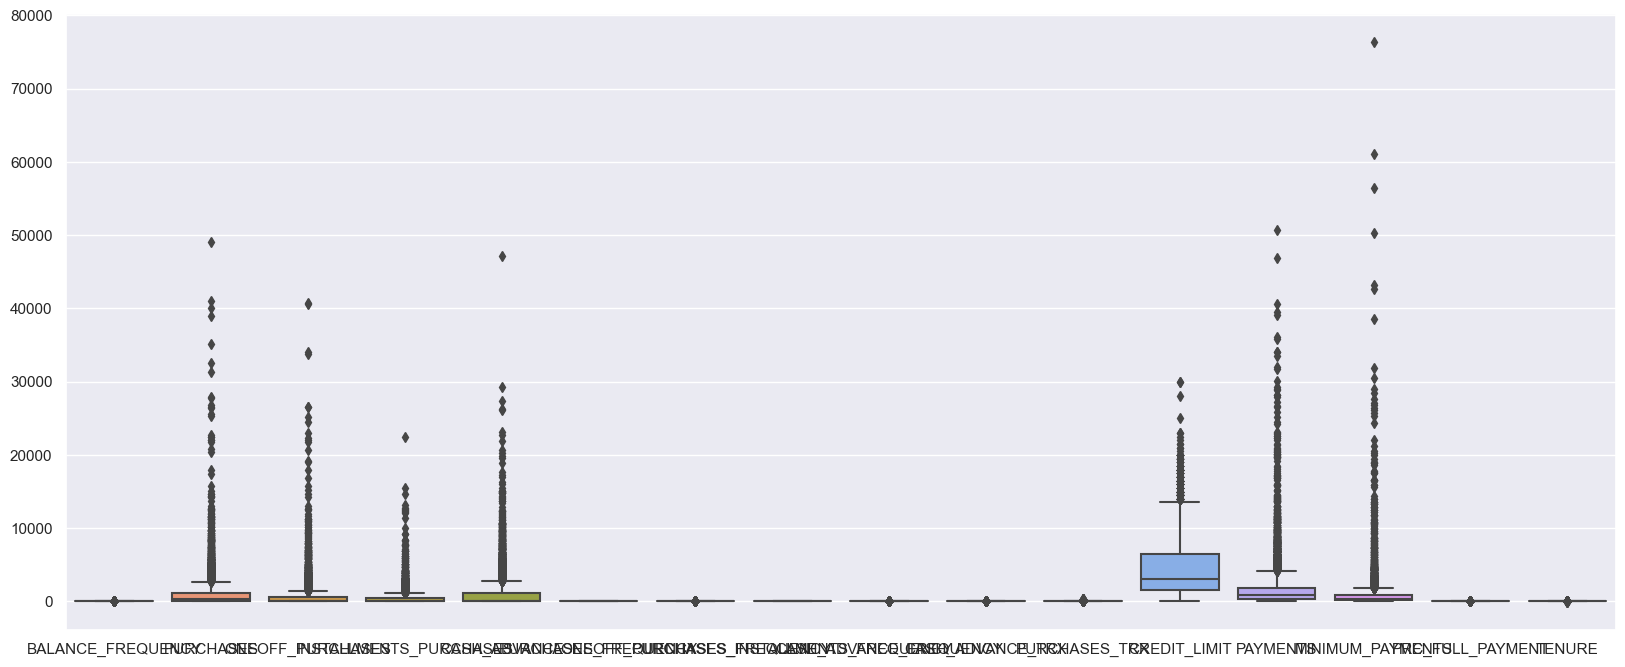

In [7]:
fig = plt.figure(figsize=(20, 8))
ax = sns.boxplot(data=data, orient="v")

Separacion de datos de int64, float64 y datos no numericos

In [8]:
float_cols = data.select_dtypes(include=['float64']).columns
int_cols = data.select_dtypes(include=['int64']).columns
categoric_cols = data.select_dtypes(include=['object']).columns

Visualizacion de columnas tipo float64

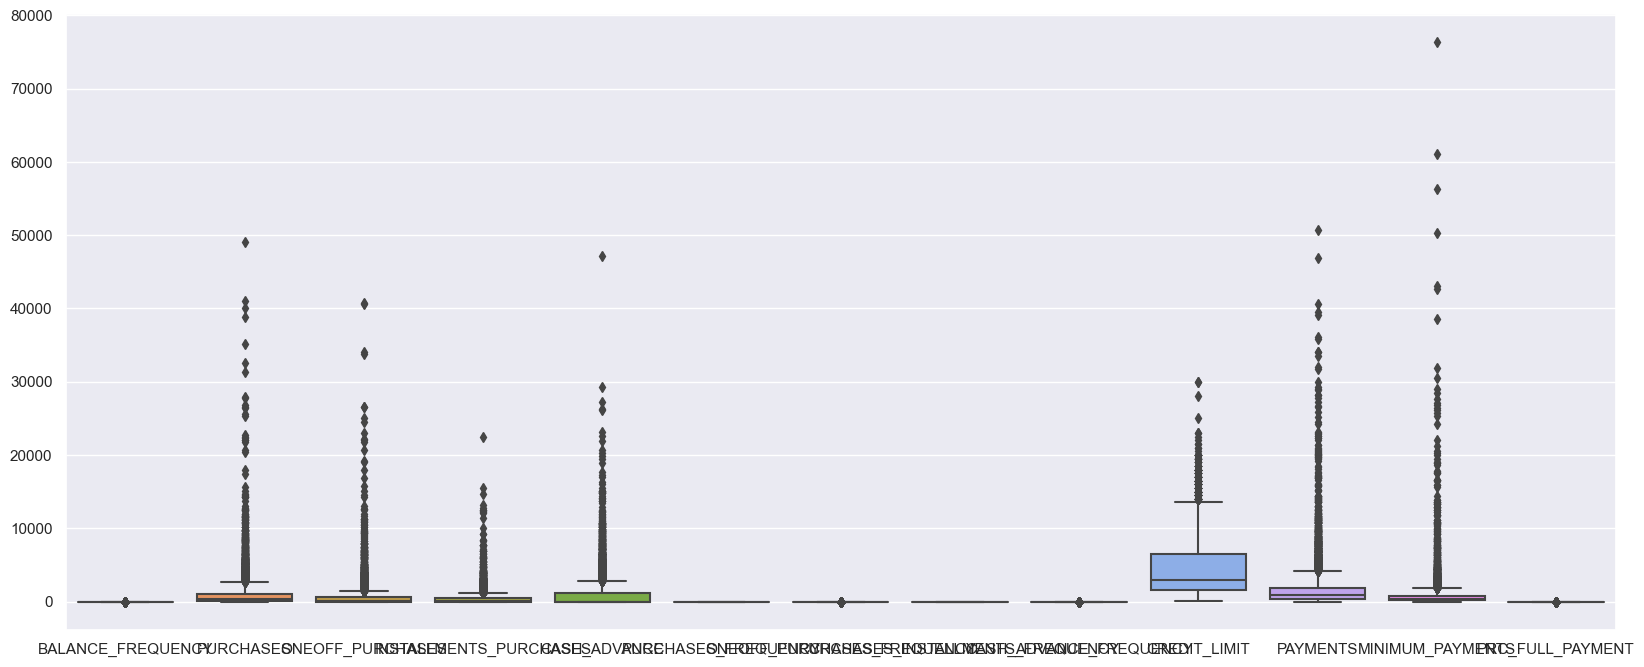

In [9]:
fig = plt.figure(figsize=(20, 8))
ax = sns.boxplot(data=data[float_cols], orient="v")

Visualizacion de columnas tipo int64

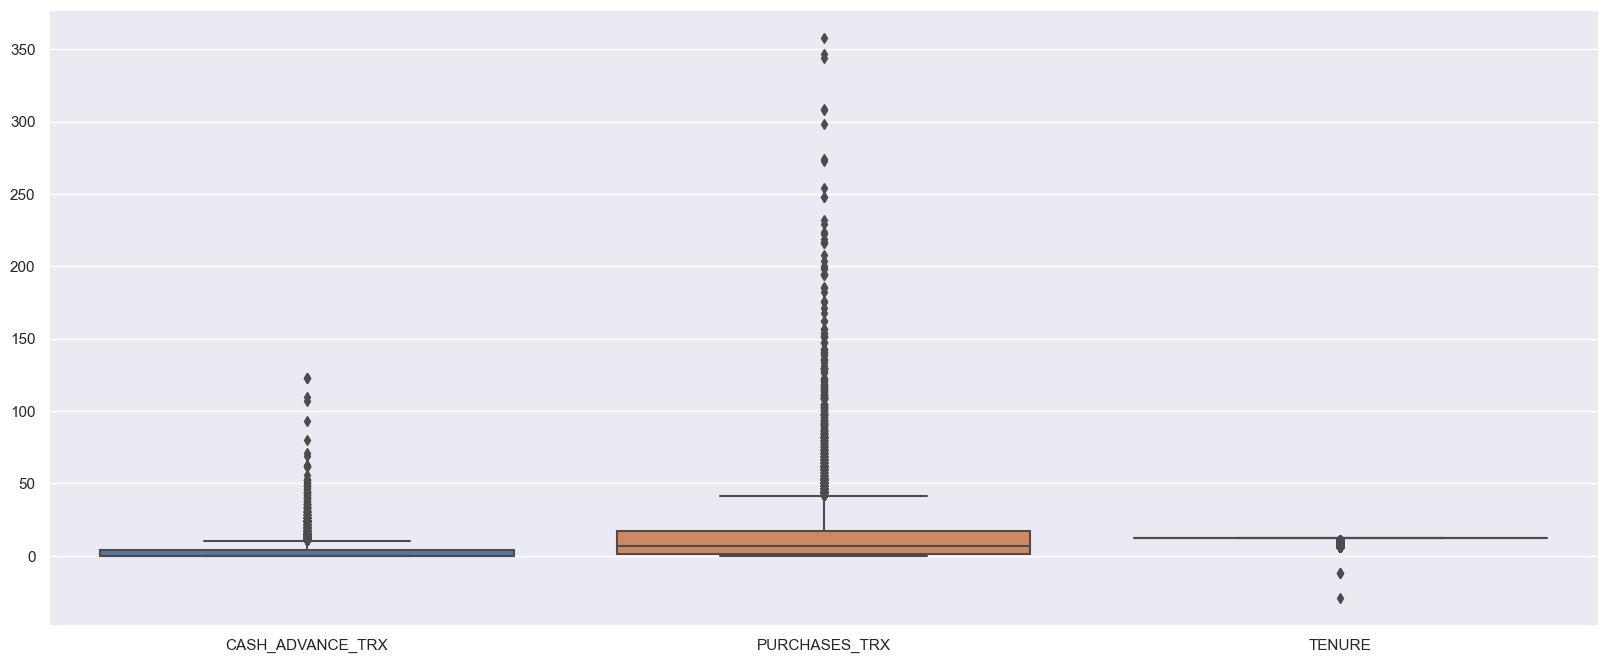

In [10]:
fig = plt.figure(figsize=(20, 8))
ax = sns.boxplot(data=data[int_cols], orient="v")

Visualizacion de columnas tipo categoricas

In [11]:
 # Datos categoricos
categoric_cols

Index(['CUST_ID', 'BALANCE'], dtype='object')

In [12]:
data[categoric_cols].describe()

,CUST_ID,BALANCE
count,8961,8961
unique,8950,8871
top,C10298,0
freq,4,80


**Observacion**: identificamos que ninguna de las variables del modelo tiene un comportamiento categorico, es decir, que sus valores esten dentro de un conjunto de valores predefinidos.

Dentro de los datos se podria decir que la columna Tenure podria ser una categorica debido a que tiene unos pocos valores unicos dentro del dataset que suelen repetirse, no obstante, conceptualmente esta se refiere a la cantidad de meses como cliente de una persona, por lo que no puede ser considerado como categorica y por lo tanto el dataset no tiene columnas categoricas en el sentido de su definicion, siendo estas columnas "categoricas" aquellas que tienen un conjunto predefinido de valores posibles y cuyos valores se relacionan con el mundo real conceptualmente.

**3. Analisis de calidad de datos**

Análisis a nivel de calidad de datos y, en particular, a nivel de las dimensiones de calidad (completitud, unicidad, consistencia, validez) para identificar las actividades de preparación que requieren los datos.

3.1 Completitud - Análisis de valores nulos o vacíos

In [17]:
# Porcentaje de valores nulos por columna
((data.isnull().sum() / data.shape[0]) * 100).sort_values(ascending=False) # from 100% to 0%


MINIMUM_PAYMENTS                    3.492914
ONEOFF_PURCHASES_FREQUENCY          0.145073
CASH_ADVANCE                        0.111595
CREDIT_LIMIT                        0.078116
CUST_ID                             0.000000
CASH_ADVANCE_FREQUENCY              0.000000
PRC_FULL_PAYMENT                    0.000000
PAYMENTS                            0.000000
PURCHASES_TRX                       0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
BALANCE                             0.000000
PURCHASES_FREQUENCY                 0.000000
INSTALLMENTS_PURCHASES              0.000000
ONEOFF_PURCHASES                    0.000000
PURCHASES                           0.000000
BALANCE_FREQUENCY                   0.000000
TENURE                              0.000000
dtype: float64

Se identifican como candidatas a tratar los nulos de las columnas MINIMUM_PAYMENTS, ONEOFF_PURCHASES_FREQUENCY, CASH_ADVANCE & CREDIT_LIMIT. Para las cuales se pueden tomar decisiones diferentes.

MINIMUM_PAYMENTS: revisando los datos nos damos cuenta de que cada vez que minium_payments es nulo es por dos razones posibles: (1) el valor para la misma fila en payments es igual a cero, o (2) ese valor es diferente a cero.

- Para el primer caso donde payments = 0 & minimum payments = null se puede asumir que la deuda esta paga, por lo que la persona debe 0 tambien, asi que minimum payments puede ser 0 en este caso
- Para el segundo caso donde payments != 0 & minimum payments = null se puede asumir que esa podria ser la ultima "cuota" de la persona y que por lo tanto el valor minimo a pagar seria ese al no estar definido. Tambien se podria asumir que este sea 0 aunque esto implicaria que no se represente adecuadamente la realidad, por eso se decide hacer la primera opcion que es igualar payments con minimum payments en estos casos.

ONEOFF_PURCHASES_FREQUENCY